In [57]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [58]:
cars_data = pd.read_csv('C:\\Users\\Digvijay\\Downloads\\Cardetails.csv')

In [59]:
cars_data.sample(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
288,Mercedes-Benz GL-Class 220d 4MATIC Sport,2018,4600000,7976,Diesel,Individual,Automatic,First Owner,17.9 kmpl,2143 CC,170 bhp,400Nm@ 1400-2800rpm,5.0
74,Maruti Swift VDI Deca,2016,630000,70000,Diesel,Individual,Manual,First Owner,25.2 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
7371,Maruti Baleno Delta,2017,620000,37000,Petrol,Dealer,Manual,First Owner,21.01 kmpl,1197 CC,81.80 bhp,113Nm@ 4200rpm,5.0


In [60]:
cars_data.drop(columns=['torque'], inplace=True)

In [61]:
cars_data.sample(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
2066,Tata Manza Club Class Quadrajet90 VX,2013,260000,189000,Diesel,Individual,Manual,First Owner,21.02 kmpl,1248 CC,88.76 bhp,5.0
5497,Maruti Wagon R VXI BSIII,2012,260000,31000,Petrol,Individual,Manual,First Owner,18.9 kmpl,998 CC,67.1 bhp,5.0
2401,Ford Aspire Trend Diesel BSIV,2018,530000,80000,Diesel,Individual,Manual,First Owner,26.1 kmpl,1498 CC,99.23 bhp,5.0
5668,Tata Indica V2 DLX,2008,67000,80000,Diesel,Individual,Manual,Second Owner,17.2 kmpl,1396 CC,53.5 bhp,5.0
3169,Tata Sumo EX,2016,445000,63000,Diesel,Dealer,Manual,First Owner,15.3 kmpl,2956 CC,83.8 bhp,9.0
7739,Hyundai i20 Asta 1.2,2015,550000,70000,Petrol,Individual,Manual,First Owner,18.6 kmpl,1197 CC,81.83 bhp,5.0
2143,Hyundai Creta 1.6 CRDi SX Option,2015,822000,60000,Diesel,Individual,Manual,First Owner,19.67 kmpl,1582 CC,126.2 bhp,5.0
5001,Honda City 2017-2020 GXi,2007,210000,140000,Petrol,Individual,Manual,First Owner,17.7 kmpl,1497 CC,78 bhp,5.0
4464,Mahindra Bolero 2011-2019 ZLX,2013,600000,45000,Diesel,Individual,Manual,First Owner,15.96 kmpl,2523 CC,62.1 bhp,7.0
7343,BMW X4 M Sport X xDrive20d,2019,5800000,21000,Diesel,Dealer,Automatic,First Owner,16.78 kmpl,1995 CC,190 bhp,5.0


In [62]:
cars_data.shape

(8128, 12)

In [63]:
cars_data.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
seats            221
dtype: int64

In [64]:
cars_data['mileage'] = cars_data['mileage'].str.replace(' kmpl', '')

In [65]:
import pandas as pd

# Assuming 'cars_data' is your DataFrame and 'mileage' is the column containing mileage data
cars_data['mileage'] = pd.to_numeric(cars_data['mileage'], errors='coerce')

# Calculate the mean of the 'mileage' column
mileage_mean = cars_data['mileage'].mean()

# Fill null values in the 'mileage' column with the mean value
cars_data['mileage'].fillna(mileage_mean, inplace=True)


In [66]:
cars_data['mileage'].fillna(mileage_mean, inplace=True)


In [67]:
cars_data.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage            0
engine           221
max_power        215
seats            221
dtype: int64

In [68]:
# Assuming 'cars_data' is your DataFrame
cars_data.dropna(subset=['engine', 'max_power', 'seats'], inplace=True)


In [69]:
cars_data.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

In [70]:
cars_data.shape

(7907, 12)

In [71]:
cars_data.describe()

,year,selling_price,km_driven,mileage,seats
count,7907.000000,7.907000e+03,7.907000e+03,7907.000000,7907.000000
mean,2013.982168,6.497417e+05,6.919256e+04,19.390375,5.416719
std,3.866650,8.135565e+05,5.678976e+04,3.979443,0.959588
min,1994.000000,2.999900e+04,1.000000e+00,0.000000,2.000000
25%,2012.000000,2.700000e+05,3.500000e+04,16.780000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.330000,5.000000
75%,2017.000000,6.900000e+05,9.575000e+04,22.320000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,14.000000


Descriptive Statistics for Mileage:
count    7907.000000
mean       19.390375
std         3.979443
min         0.000000
25%        16.780000
50%        19.330000
75%        22.320000
max        42.000000
Name: mileage, dtype: float64


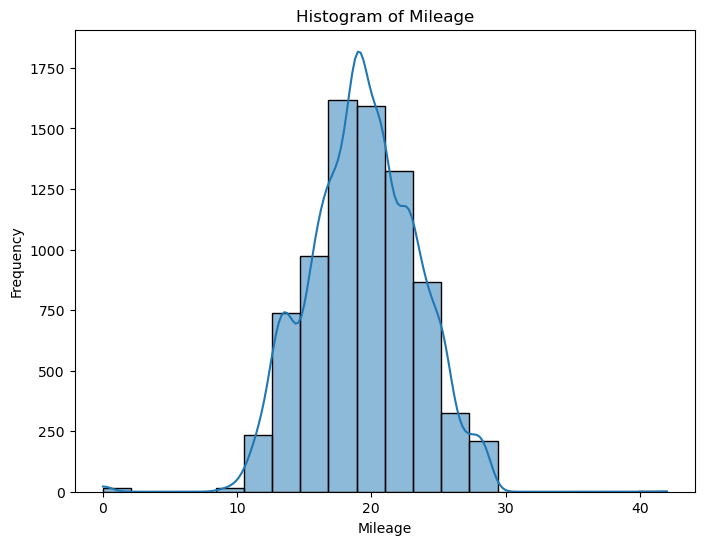

In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'cars_data' is your DataFrame and 'mileage' is the column containing mileage data
mileage_data = cars_data['mileage']

# Descriptive statistics
print("Descriptive Statistics for Mileage:")
print(mileage_data.describe())

plt.figure(figsize=(8, 6))
sns.histplot(mileage_data, bins=20, kde=True)
plt.title('Histogram of Mileage')
plt.xlabel('Mileage')
plt.ylabel('Frequency')
plt.show()


In [73]:
cars_data['mileage'].max()

42.0

In [74]:
# Assuming 'cars_data' is your DataFrame
mileage_threshold = 30
high_mileage_cars = cars_data[cars_data['mileage'] > mileage_threshold]

# Display the rows where mileage is greater than 30
print(high_mileage_cars)


                              name  year  selling_price  km_driven    fuel  \
170  Volvo XC90 T8 Excellence BSIV  2017       10000000      30000  Petrol   

    seller_type transmission        owner  mileage   engine max_power  seats  
170  Individual    Automatic  First Owner     42.0  1969 CC   400 bhp    4.0  


In [75]:
# Assuming 'cars_data' is your DataFrame
cars_data = cars_data[cars_data['mileage'] <= 40]

# Display the DataFrame after filtering
print(cars_data)


                              name  year  selling_price  km_driven    fuel  \
0           Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1     Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2         Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3        Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4           Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
...                            ...   ...            ...        ...     ...   
8123             Hyundai i20 Magna  2013         320000     110000  Petrol   
8124         Hyundai Verna CRDi SX  2007         135000     119000  Diesel   
8125        Maruti Swift Dzire ZDi  2009         382000     120000  Diesel   
8126               Tata Indigo CR4  2013         290000      25000  Diesel   
8127               Tata Indigo CR4  2013         290000      25000  Diesel   

     seller_type transmission                 owner  mileage   

Descriptive Statistics for selling_price:
count    7.906000e+03
mean     6.485590e+05
std      8.067818e+05
min      2.999900e+04
25%      2.700000e+05
50%      4.500000e+05
75%      6.900000e+05
max      7.200000e+06
Name: selling_price, dtype: float64


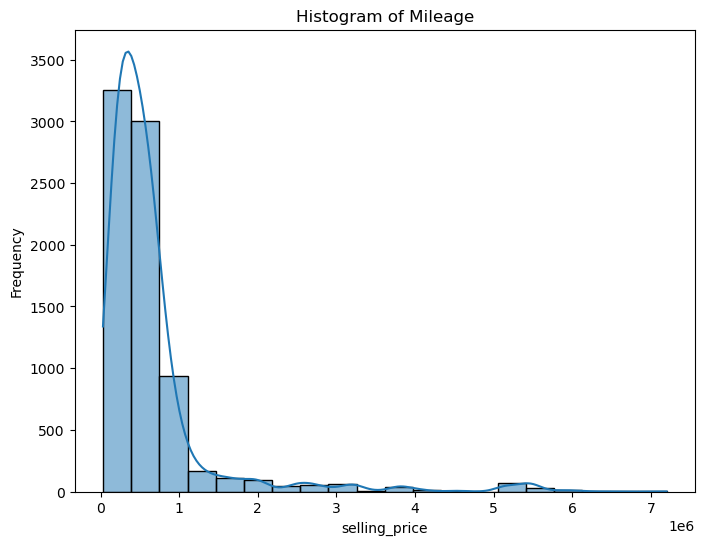

In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'cars_data' is your DataFrame and 'mileage' is the column containing mileage data
mileage_data = cars_data['selling_price']

# Descriptive statistics
print("Descriptive Statistics for selling_price:")
print(mileage_data.describe())

plt.figure(figsize=(8, 6))
sns.histplot(mileage_data, bins=20, kde=True)
plt.title('Histogram of Mileage')
plt.xlabel('selling_price')
plt.ylabel('Frequency')
plt.show()


In [77]:
# Assuming 'cars_data' is your DataFrame
selling_price_thr = 4000000
high_selling_price_cars = cars_data[cars_data['selling_price'] > selling_price_thr]

# Display the value counts of the 'selling_price' column
selling_price_counts = high_selling_price_cars['selling_price'].value_counts()
print(selling_price_counts)


5150000    34
5500000    33
5400000    30
4100000     6
6000000     6
4500000     4
5200000     4
5800000     2
4600000     2
5830000     2
5850000     1
7200000     1
4090000     1
6223000     1
5923000     1
6523000     1
Name: selling_price, dtype: int64


In [78]:
# Assuming 'cars_data' is your DataFrame
selling_price_thr = 4000000

# Filter out the rows where selling price is greater than 4,000,000
cars_data = cars_data[cars_data['selling_price'] <= selling_price_thr]

# Display the DataFrame after filtering
print(cars_data)


                              name  year  selling_price  km_driven    fuel  \
0           Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1     Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2         Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3        Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4           Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
...                            ...   ...            ...        ...     ...   
8123             Hyundai i20 Magna  2013         320000     110000  Petrol   
8124         Hyundai Verna CRDi SX  2007         135000     119000  Diesel   
8125        Maruti Swift Dzire ZDi  2009         382000     120000  Diesel   
8126               Tata Indigo CR4  2013         290000      25000  Diesel   
8127               Tata Indigo CR4  2013         290000      25000  Diesel   

     seller_type transmission                 owner  mileage   

In [79]:
cars_data.shape

(7777, 12)

In [80]:
cars_data['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [81]:
def get_brand_name(car_name):
    car_name = car_name.split(' ')[0]
    return car_name.strip()

In [82]:
def clean_data(value):
    value = value.split(' ')[0]
    value = value.strip()
    if value == '':
        value = 0
    return float(value)

In [83]:
get_brand_name('Maruti  Swift Dzire VDI')

'Maruti'

In [84]:
cars_data['name'] = cars_data['name'].apply(get_brand_name)

In [85]:
cars_data['name'].unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Datsun', 'Jeep', 'Mercedes-Benz',
       'Mitsubishi', 'Audi', 'Volkswagen', 'BMW', 'Nissan', 'Jaguar',
       'MG', 'Volvo', 'Daewoo', 'Kia', 'Fiat', 'Force', 'Land',
       'Ambassador', 'Ashok', 'Isuzu', 'Opel'], dtype=object)

In [86]:
cars_data['name'].replace(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Datsun', 'Jeep', 'Mercedes-Benz',
       'Mitsubishi', 'Audi', 'Volkswagen', 'BMW', 'Nissan', 'Lexus',
       'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo', 'Kia', 'Fiat', 'Force',
       'Ambassador', 'Ashok', 'Isuzu', 'Opel'],
                          [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]
                          ,inplace=True)

In [87]:
cars_data['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [88]:
cars_data['transmission'].replace(['Manual', 'Automatic'],[1,2], inplace=True)

In [89]:
cars_data['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [90]:
cars_data['seller_type'].replace(['Individual', 'Dealer', 'Trustmark Dealer'],[1,2,3], inplace=True)

In [91]:
cars_data['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [92]:
cars_data['fuel'].replace(['Diesel', 'Petrol', 'LPG', 'CNG'],[1,2,3,4], inplace=True)

In [93]:
cars_data.reset_index(inplace=True)

In [94]:
cars_data

,index,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,0,1,2014,450000,145500,1,1,1,First Owner,23.40,1248 CC,74 bhp,5.0
1,1,2,2014,370000,120000,1,1,1,Second Owner,21.14,1498 CC,103.52 bhp,5.0
2,2,3,2006,158000,140000,2,1,1,Third Owner,17.70,1497 CC,78 bhp,5.0
3,3,4,2010,225000,127000,1,1,1,First Owner,23.00,1396 CC,90 bhp,5.0
4,4,1,2007,130000,120000,2,1,1,First Owner,16.10,1298 CC,88.2 bhp,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7772,8123,4,2013,320000,110000,2,1,1,First Owner,18.50,1197 CC,82.85 bhp,5.0
7773,8124,4,2007,135000,119000,1,1,1,Fourth & Above Owner,16.80,1493 CC,110 bhp,5.0
7774,8125,1,2009,382000,120000,1,1,1,First Owner,19.30,1248 CC,73.9 bhp,5.0
7775,8126,9,2013,290000,25000,1,1,1,First Owner,23.57,1396 CC,70 bhp,5.0


In [95]:
import pandas as pd

# Assuming cars_data is your DataFrame and 'engine' is the column containing strings with '1248 CC' format
cars_data['engine'] = cars_data['engine'].str.extract('(\d+)').astype(float)


In [96]:
cars_data['owner'].replace(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'],
                           [1,2,3,4,5], inplace=True)

In [97]:
cars_data.drop(columns=['max_power'],inplace=True)

In [98]:
cars_data.isnull().sum()

index            0
name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
seats            0
dtype: int64

In [101]:
input_data = cars_data.drop(columns=['selling_price'])
output_data =cars_data['selling_price']

In [102]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Split the data into training and testing sets
input_data = cars_data.drop(columns=['selling_price'])
output_data = cars_data['selling_price']
x_train, x_test, y_train, y_test = train_test_split(input_data, output_data, test_size=0.2)

# Create a Random Forest regressor model
modelt= RandomForestRegressor()

# Train the model
modelt.fit(x_train, y_train)

# Make predictions on the test data
predict = modelt.predict(x_test)

# Calculate the R2 score
r2 = r2_score(y_test, predict)
print("R2 Score:", r2)


R2 Score: 0.9506069259279097


In [49]:
cars_data.drop(columns=['index'],inplace=True)

In [54]:
cars_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,seats
0,1,2014,450000,145500,1,1,1,1,23.40,1248.0,5.0
1,2,2014,370000,120000,1,1,1,2,21.14,1498.0,5.0
2,3,2006,158000,140000,2,1,1,3,17.70,1497.0,5.0
3,4,2010,225000,127000,1,1,1,1,23.00,1396.0,5.0
4,1,2007,130000,120000,2,1,1,1,16.10,1298.0,5.0


In [51]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Split the data into training and testing sets
input_data = cars_data.drop(columns=['selling_price'])
output_data = cars_data['selling_price']
x_train, x_test, y_train, y_test = train_test_split(input_data, output_data, test_size=0.2)

# Create a Random Forest regressor model
modelx = RandomForestRegressor()

# Train the model
modelx.fit(x_train, y_train)

# Make predictions on the test data
predict = modelx.predict(x_test)

# Calculate the R2 score
r2 = r2_score(y_test, predict)
print("R2 Score:", r2)


R2 Score: 0.9309338867051782


In [55]:
input_data_model = pd.DataFrame(
    [[1,3,2006,140000,2,1,1,3,17.70,1497,5]])

In [56]:
model.predict(input_data_model)

D:\New folder\pp\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([163179.99])

In [103]:
import pickle
filename = 'final.sav'
pickle.dump(modelt, open(filename,'wb'))

In [104]:
load_model= pickle.load(open(filename,'rb'))

In [ ]:
pip install scikit-learn==1.2.2


In [107]:
from joblib import dump, load

# Save the model
dump(modelt, 'final1.joblib')

# Load the model
model = load('final1.joblib')


In [108]:
from joblib import load

# Load the model
model = load('final1.joblib')

# Prepare your data for prediction
# Example data (replace this with your actual data)
new_data = [[1,3,2006,140000,2,1,1,3,17.70,1497,5]]  # Replace feature1_value, feature2_value, ... with your actual feature values

# Make predictions
predictions = model.predict(new_data)

# Print the predictions
print("Predictions:", predictions)


Predictions: [167229.98]


D:\New folder\pp\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
